# Linear Regression

# One dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

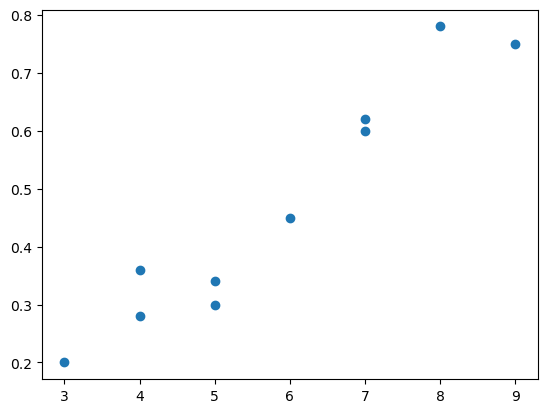

In [2]:
x = [5, 7, 6, 5, 8, 3, 9, 4, 4, 7]
y = [0.3, 0.6, 0.45, 0.34, 0.78, 0.2, 0.75, 0.36, 0.28, 0.62]

plt.scatter(x, y)

## Gradient descent

In [3]:
w0_init = np.random.randn()
w1_init = np.random.randn()
learning_rate = 0.01

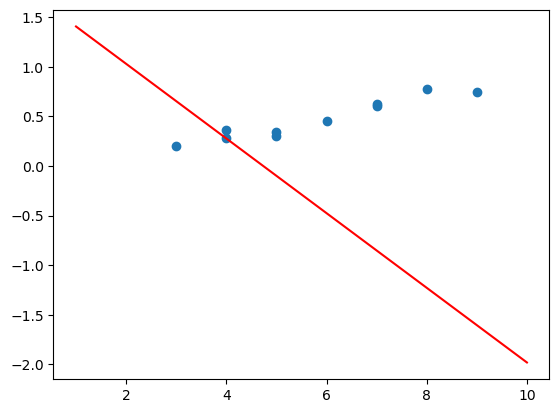

In [4]:
# Affichage du modele avant l'apprentissage
z = np.linspace(1, 10, 100)
model = w0_init + w1_init * z
plt.scatter(x,y)
plt.plot(z, model, 'r')

In [5]:
def gradient_descent_1(x, y, w0, w1):    
    for k in range(1000):
        for j in range(len(x)):
            h = w1 * x[j] + w0
            w0 = w0 + 2 * learning_rate * (y[j] - h)
            w1 = w1 + 2 * learning_rate * (y[j] - h) * x[j]
    return w0, w1

In [6]:
w0, w1 = gradient_descent_1(x, y, w0_init, w1_init)
print(w0, w1)

-0.09206879735600028 0.10172411390800003


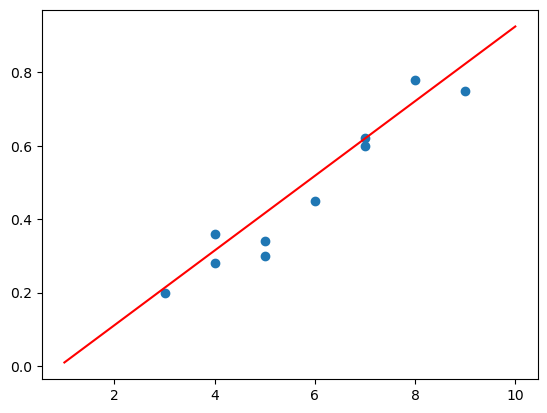

In [7]:
# Affichage du modele apres l'apprentissage
z = np.linspace(1, 10, 100)
plt.scatter(x,y)
plt.plot(z, w0 + w1 * z,'r')

## Normal Equation

In [8]:
X = np.array([x, np.ones(len(x))]).T  # Adding a column of ones for the intercept term
y = np.array(y)

In [9]:
X

array([[5., 1.],
       [7., 1.],
       [6., 1.],
       [5., 1.],
       [8., 1.],
       [3., 1.],
       [9., 1.],
       [4., 1.],
       [4., 1.],
       [7., 1.]])

In [10]:
X.T

array([[5., 7., 6., 5., 8., 3., 9., 4., 4., 7.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [11]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 0.10255952, -0.12684524])

In [12]:
theta[0]

0.10255952380952393

In [13]:
theta[1]

-0.126845238095239

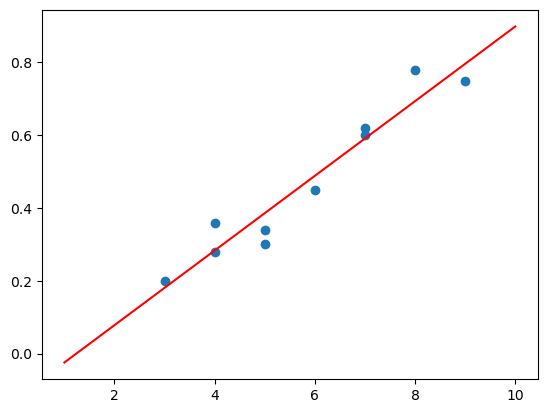

In [14]:
# Affichage du modele apres l'apprentissage
z = np.linspace(1, 10, 100)
plt.scatter(x,y)
plt.plot(z, theta[1] + theta[0] * z,'r')

# Two dimensions

In [15]:
x2 = [[5,3], [7,6], [5,4], [3,4], [8,7], [2,3], [7,6], [4,5], [2,3], [7,5]]

## Gradient descent

In [16]:
x2 = np.array(x2)
learning_rate_2 = 0.005
epochs = 1000

In [17]:
def gradient_descent_2(x, y, epochs, learning_rate):
    
    x = np.array(x)
    y = np.array(y)
    
    w = np.random.randn(x.shape[1])
    w0 = np.random.randn(1)
    m = len(y)  
    cost_list = []
    w_history = []
    for k in range(epochs):
        loss = 0
        for j in range(m):
            h = w0 + np.dot(w,x[j])
            w0 = w0 + learning_rate * (y[j] - h)
            w = w + learning_rate * (y[j] - h) * x[j]
            loss = loss + 0.5 * (y[j]-h)**2
        cost_list.append(loss/m)
        # Print cost every at intervals 10 times or as many iterations if < 10
        if k%math.ceil(epochs/10) == 0:
            w_history.append(w0)
            print(f"Iteration {k:4}: Cost {float(cost_list[-1]):8.5f}   ")
    return w0, w, cost_list

In [18]:
w2, w3, cost = gradient_descent_2(x2, y, epochs, learning_rate_2)
print(w2, w3)

Iteration    0: Cost  8.43802   
Iteration  100: Cost  0.00660   
Iteration  200: Cost  0.00378   
Iteration  300: Cost  0.00269   
Iteration  400: Cost  0.00221   
Iteration  500: Cost  0.00199   
Iteration  600: Cost  0.00190   
Iteration  700: Cost  0.00186   
Iteration  800: Cost  0.00185   
Iteration  900: Cost  0.00184   
[-0.08645933] [0.05173141 0.06740085]


## Normal Equation

In [19]:
X2 = np.array(x2)
X2 = np.column_stack((x2, np.ones(10)))

In [20]:
X2

array([[5., 3., 1.],
       [7., 6., 1.],
       [5., 4., 1.],
       [3., 4., 1.],
       [8., 7., 1.],
       [2., 3., 1.],
       [7., 6., 1.],
       [4., 5., 1.],
       [2., 3., 1.],
       [7., 5., 1.]])

In [21]:
X2.T

array([[5., 7., 5., 3., 8., 2., 7., 4., 2., 7.],
       [3., 6., 4., 4., 7., 3., 6., 5., 3., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
theta_2 = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
theta_2

array([ 0.04945205,  0.06767123, -0.09054795])

## Mean square error comparison

In [23]:
def mean_square_error(x, y, w0, w):
    x = np.array(x)
    y = np.array(y)
    
    m = len(y) 
    loss = 0
    for j in range(m):
        h = w0 + np.dot(w, x[j])
        loss = loss + (y[j]-h)**2
    mse = loss/m
    return mse

In [24]:
mse_gradient_1 = mean_square_error(x, y, w0, w1)
print(f"Cost of gradient descent for one dimension : {mse_gradient_1}")

mse_normal_equation_1 = mean_square_error(x, y, theta[1], theta[0])
print(f"Cost of normal equation for one dimension : {mse_normal_equation_1}")

mse_gradient_2 = mean_square_error(x2, y, w2, w3)
print(f"Cost of gradient descent for two dimensions : {mse_gradient_2}")

mse_normal_equation_2 = mean_square_error(x2, y, theta_2[2], theta_2[:2])
print(f"Cost of normal equation for two dimensions : {mse_normal_equation_2}")

Cost of gradient descent for one dimension : 0.0036722016227332373
Cost of normal equation for one dimension : 0.002773988095238094
Cost of gradient descent for two dimensions : [0.00308943]
Cost of normal equation for two dimensions : 0.002866575342465756


In [25]:
x3 = [[5,4], [7.5,8], [6,4], [3.4,4], [8,7], [2,3], [6.5,6], [3,5], [2,3], [7,5]]
y2 = [0.33, 0.6, 0.4, 0.4, 0.78, 0.5, 0.73, 0.36, 0.31, 0.65]

In [26]:
w4, w5, cost = gradient_descent_2(x3, y2, epochs, learning_rate_2)
print(w4, w5)

Iteration    0: Cost  1.94708   
Iteration  100: Cost  0.04107   
Iteration  200: Cost  0.01823   
Iteration  300: Cost  0.01050   
Iteration  400: Cost  0.00784   
Iteration  500: Cost  0.00695   
Iteration  600: Cost  0.00666   
Iteration  700: Cost  0.00657   
Iteration  800: Cost  0.00655   
Iteration  900: Cost  0.00655   
[0.14154039] [0.04730065 0.03351498]


In [27]:
X3 = np.array(x3)
X3 = np.column_stack((x3, np.ones(10)))

In [28]:
theta_3 = np.linalg.inv(X3.T.dot(X3)).dot(X3.T).dot(y2)
theta_3

array([0.0362699 , 0.0338755 , 0.15720975])

In [29]:
mse_gradient_3 = mean_square_error(x3, y2, w4, w5)
print(f"Cost of gradient descent for two dimensions : {mse_gradient_3}")

mse_normal_equation_3 = mean_square_error(x3, y2, theta_3[2], theta_3[:2])
print(f"Cost of normal equation for two dimensions : {mse_normal_equation_3}")

Cost of gradient descent for two dimensions : [0.01297277]
Cost of normal equation for two dimensions : 0.01096589886261554
